In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam1.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
352,ham,TODAY is Sorry day.! If ever i was angry with ...,NaN,NaN,NaN
4289,ham,"For you information, IKEA is spelled with all ...",NaN,NaN,NaN
2650,ham,Do you like shaking your booty on the dance fl...,NaN,NaN,NaN
5173,ham,U 2.,NaN,NaN,NaN
3063,ham,Ok. How many should i buy.,NaN,NaN,NaN


In [6]:
# STEP

# Data cleaning
# EDA
# text preprocessing
# model building
# evaluation
# improvement
# website
# deploy

# DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
1451,ham,Ya! when are Ì_ taking ure practical lessons? ...
1263,ham,Ok. No wahala. Just remember that a friend in ...
2446,ham,"Sorry, I'll call later"
5256,ham,Well she's in for a big surprise!
123,ham,I am going to sao mu today. Will be done only ...


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df.sample(5)

,target,text
710,ham,Height of Confidence: All the Aeronautics prof...
1875,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
5151,ham,No problem with the renewal. I.ll do it right ...
4152,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...
3022,ham,You are a very very very very bad girl. Or lady.


In [13]:
df.target

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
30       ham
31       ham
32       ham
33       ham
34      spam
35       ham
36       ham
37       ham
38       ham
39       ham
40       ham
41       ham
42      spam
43       ham
44       ham
45       ham
46       ham
47       ham
48       ham
49       ham
50       ham
51       ham
52       ham
53       ham
54      spam
55       ham
56      spam
57       ham
58       ham
59       ham
60       ham
61       ham
62       ham
63       ham
64       ham
65      spam
66       ham
67      spam
68      spam
69       ham
70       ham
71       ham
72       ham
73       ham
74       ham
75       ham
76       ham

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#check duplicate values
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

# 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

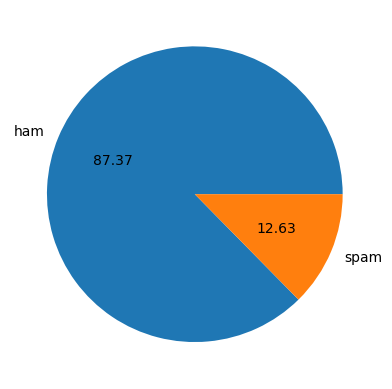

In [24]:
plt.pie(df['target'].value_counts(),labels=('ham','spam'),autopct='%0.2f')
plt.show

In [25]:
# data is imbalance

In [26]:
import nltk

In [28]:
# nltk.download('punkt')

In [29]:
df['num_characters'] = df.text.apply(len)

In [30]:
len(df.text[1])

29

In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# num of sentances

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df.shape

(5169, 5)

In [38]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [39]:
# ham == 0 
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# spam == 1
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='num_characters', ylabel='Count'>

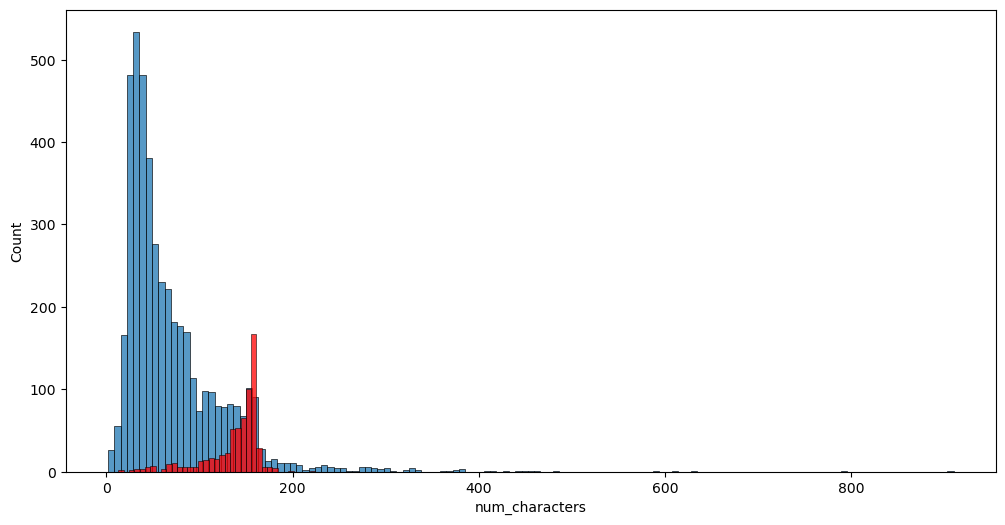

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='r')

In [43]:
df[df['target']==0].head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2


C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='num_words', ylabel='Count'>

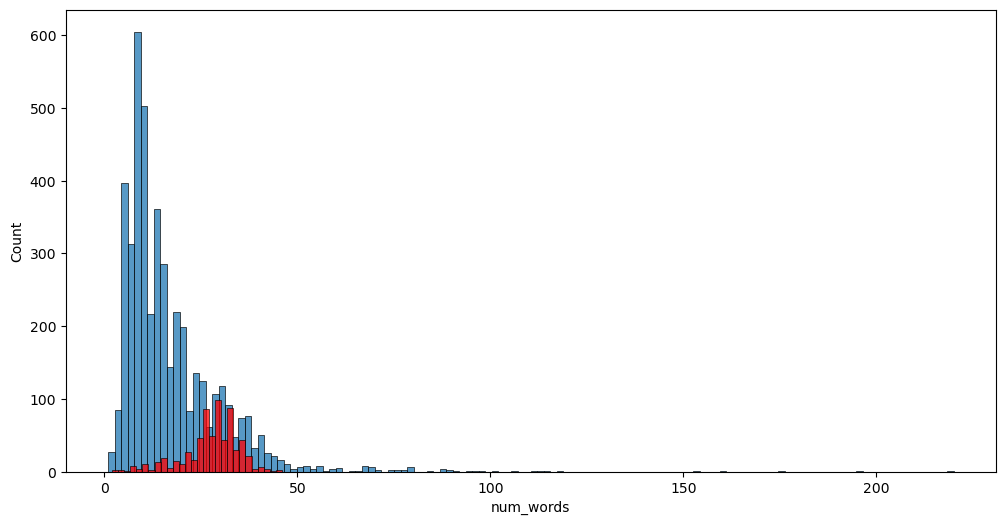

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='r')

C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

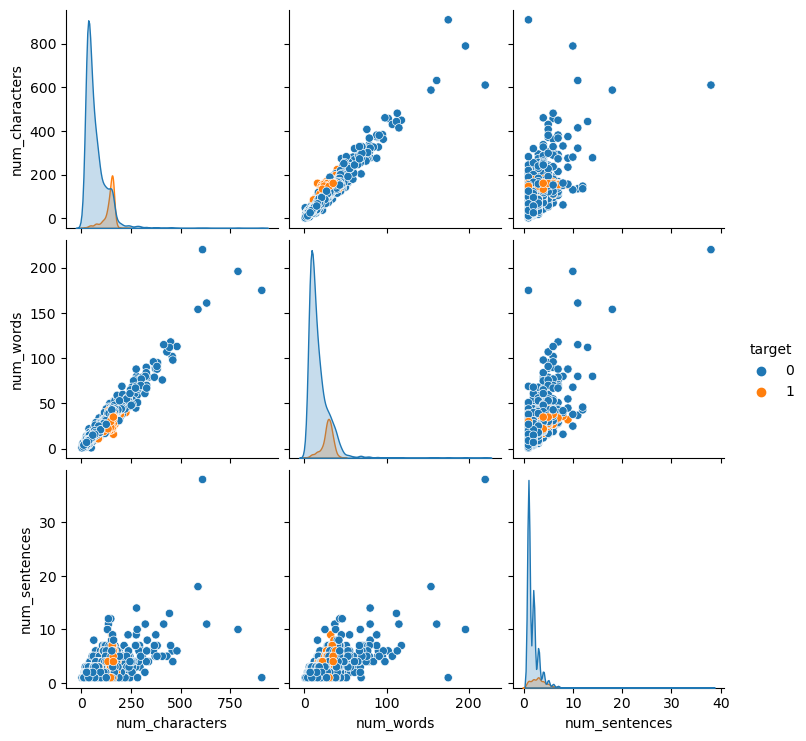

In [45]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='target')
plt.show()

In [46]:
df1 = df.drop(columns=['text'])

<Axes: >

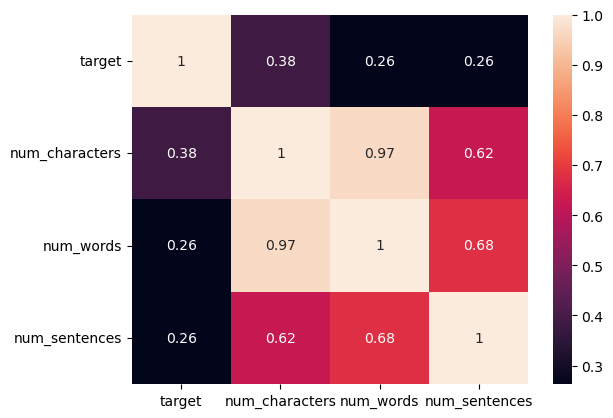

In [47]:
sns.heatmap(df1.corr(),annot=True)

# 3 Data preprocessing

    Lower case
    Tokenization
    Removing specail characters
    Removing stop words and punctation
    Stemming

In [48]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [49]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [50]:
def text_tranformation(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
#     text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

        
    return " ".join(y)

In [51]:
# text_tranformation('HI I #AM Using, pyThon ! i love the machine learning jokes')

In [52]:
# df['text'].apply(text_tranformation)

In [53]:
df['transform_text'] =df['text'].apply(text_tranformation)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
#pip install wordcloud

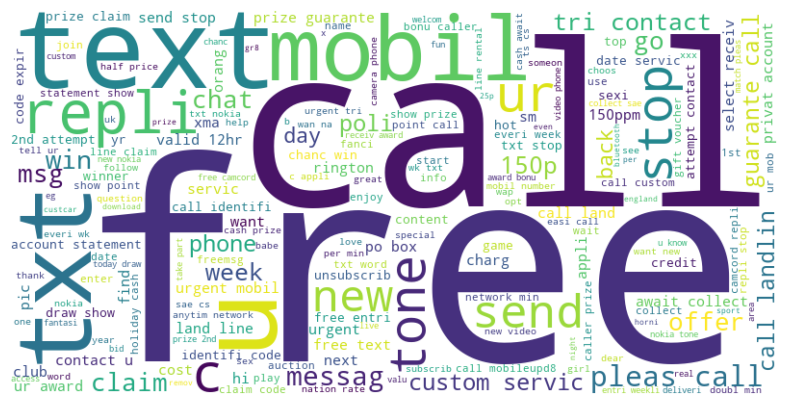

In [56]:
from wordcloud import WordCloud

#spam word chart

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Turn off axes
plt.show()

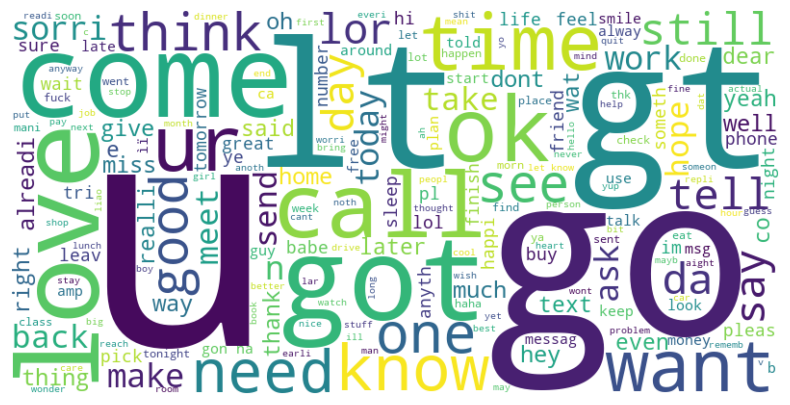

In [57]:
# ham (noraml) word chart 

df_2 = df[df['target']==0]
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(df_2.transform_text.str.cat(sep=' '))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off axes
plt.show()


In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
#convert spam word list

spamWordList = df[df['target']==1]['transform_text'].tolist() 

In [60]:
spam_corpus = []

for msg in spamWordList:
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


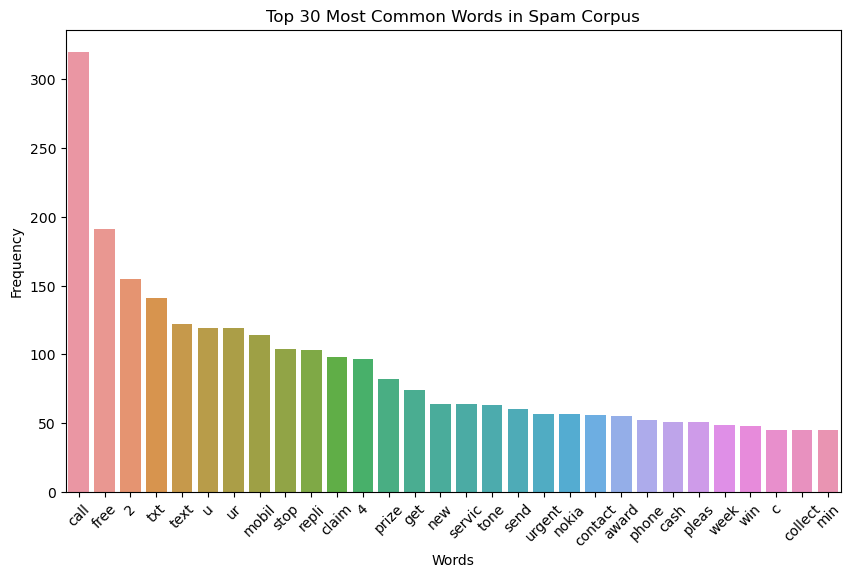

In [62]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
word_counts = Counter(spam_corpus).most_common(30)
df_top_30 = pd.DataFrame(word_counts, columns=["Word", "Frequency"])

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x="Word", y="Frequency", data=df_top_30)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()



In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
hamWordList = df[df['target']==0]['transform_text'].tolist() 

ham_corpus = []

for msg in hamWordList:
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35404

In [66]:
pd.DataFrame(Counter(ham_corpus).most_common(30)).head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


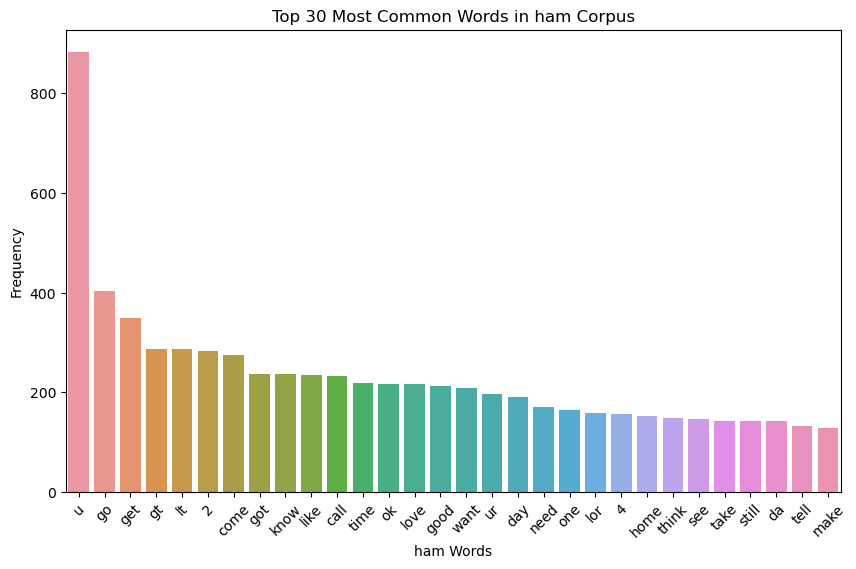

In [67]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
word_counts = Counter(ham_corpus).most_common(30)
df_top_30 = pd.DataFrame(word_counts, columns=["Word", "Frequency"])

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x="Word", y="Frequency", data=df_top_30)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Top 30 Most Common Words in ham Corpus")
plt.xlabel("ham Words")
plt.ylabel("Frequency")
plt.show()


In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
# X = cv.fit_transform(df['transform_text']).toarray()

tf_idf1 = TfidfVectorizer(max_features=3000)
X = tf_idf1.fit_transform(df['transform_text']).toarray()

In [70]:
X.shape

(5169, 3000)

In [71]:
y = df['target'].values

In [72]:
y.shape

(5169,)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=48)

In [75]:
x_train.shape

(4135, 3000)

In [76]:
x_test.shape

(1034, 3000)

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## order of confusion matrix


In [78]:
print("""
              Actual
        |   1   |   0  |
     ___________________
pred  1 |  TP=1 | FP=1 |
      0 |  FN=2 | TN=12|
      
""")


              Actual
        |   1   |   0  |
     ___________________
pred  1 |  TP=1 | FP=1 |
      0 |  FN=2 | TN=12|
      



### GaussianNB model

In [79]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
gnb_accuracy = accuracy_score(y_test,y_pred1)
gnb_confusion_matrix = confusion_matrix(y_test,y_pred1, labels=[0,1])
gnb_precision_score = precision_score(y_test,y_pred1)

print(f"gnb_accuracy : {gnb_accuracy}")
print('gnb_confusion_matrix')
print(f"{gnb_confusion_matrix}")
print(f"gnb_precision_score : {gnb_precision_score}")

gnb_accuracy : 0.8558994197292069
gnb_confusion_matrix
[[782 120]
 [ 29 103]]
gnb_precision_score : 0.4618834080717489


## MultinomialNB model

In [80]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)

mnb_accuracy = accuracy_score(y_test,y_pred1)
mnb_confusion_matrix = confusion_matrix(y_test,y_pred1, labels=[1,0]) #change label order
mnb_precision_score = precision_score(y_test,y_pred1)

print(f"mnb_accuracy : {mnb_accuracy}")
print('mnb_confusion_matrix')
print(f"{mnb_confusion_matrix}")
print(f"mnb_precision_score : {mnb_precision_score}")

mnb_accuracy : 0.965183752417795
mnb_confusion_matrix
[[ 98  34]
 [  2 900]]
mnb_precision_score : 0.98


In [81]:
new_message = ["URGENT! Your account has been suspended. Please verify your identity immediately."]
new_message_vectorized = tf_idf1.transform(new_message).toarray()  # Use tf_idf1 here

# Predict whether the new message is spam or not
prediction = mnb.predict(new_message_vectorized)
print("Spam" if prediction == 1 else "Not Spam")

Not Spam


### BernoulliNB model

In [82]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
bnb_accuracy = accuracy_score(y_test,y_pred1)
bnb_confusion_matrix = confusion_matrix(y_test,y_pred1, labels=[1,0]) # change the label order
bnb_precision_score = precision_score(y_test,y_pred1)

print(f"bnb_accuracy : {bnb_accuracy}")
print('bnb_confusion_matrix')
print(f"{bnb_confusion_matrix}")
print(f"bnb_precision_score : {bnb_precision_score}")

bnb_accuracy : 0.9796905222437138
bnb_confusion_matrix
[[114  18]
 [  3 899]]
bnb_precision_score : 0.9743589743589743


In [83]:
# tf_idf -->MNB

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier

In [85]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
xgbc = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs ={
    'SVC':svc,
    'KN':knc,
    'MNB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'XGB':xgbc
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
# train_classifier(svc,x_train,y_train,x_test,y_test)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
        current_acc , current_pre = train_classifier(clf,x_train,y_train,x_test,y_test)
        
        print('for',name)
        print('accuracy ',current_acc)
        print('precision',current_pre)
        
        accuracy_scores.append(current_acc)
        precision_scores.append(current_pre)
        

for SVC
accuracy  0.9661508704061895
precision 0.9532710280373832
for KN
accuracy  0.9245647969052224
precision 1.0
for MNB
accuracy  0.965183752417795
precision 0.98
for DT
accuracy  0.9264990328820116
precision 0.8043478260869565
for LR
accuracy  0.9468085106382979
precision 0.9139784946236559
for RF
accuracy  0.9622823984526112
precision 0.979381443298969
for AdaBoost
accuracy  0.9613152804642167
precision 0.9423076923076923
for BgC
accuracy  0.9506769825918762
precision 0.8347107438016529
for ETC
accuracy  0.9700193423597679
precision 0.9719626168224299


C:\Users\ritesh.s\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
for XGB
accuracy  0.960348162475822
precision 0.9026548672566371


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [97]:
performance_df.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precision
8,ETC,0.970019,0.971963
0,SVC,0.966151,0.953271
2,MNB,0.965184,0.980000
5,RF,0.962282,0.979381
6,AdaBoost,0.961315,0.942308
9,XGB,0.960348,0.902655
7,BgC,0.950677,0.834711
4,LR,0.946809,0.913978
3,DT,0.926499,0.804348
1,KN,0.924565,1.000000


In [98]:
performance_df.sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.924565,1.000000
2,MNB,0.965184,0.980000
5,RF,0.962282,0.979381
8,ETC,0.970019,0.971963
0,SVC,0.966151,0.953271
6,AdaBoost,0.961315,0.942308
4,LR,0.946809,0.913978
9,XGB,0.960348,0.902655
7,BgC,0.950677,0.834711
3,DT,0.926499,0.804348


In [99]:
performance_df1 = pd.melt(performance_df, id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'], 
                         var_name='Metric', value_name='value')

C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ritesh.s\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

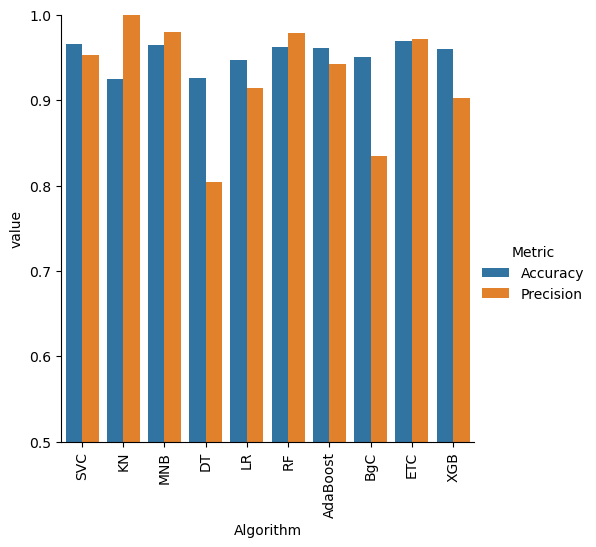

In [100]:
sns.catplot(
    x='Algorithm', 
    y='value', 
    hue='Metric', 
    data=performance_df1, 
    kind='bar', 
    height=5
)

plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

In [101]:
# # New message
# new_message = ["Congrats, you've won $1000!"]

# # Transform the new message using the same vectorizer
# new_message_vectorized = tfdf1.fit_transform(new_message)

# # Get the probabilities for each class (0 = Not Spam, 1 = Spam)
# probabilities = mnb.predict(new_message_vectorized)

# # Check the probability for class 1 (Spam) and apply the threshold
# spam_probability = probabilities[0][1]  # Get the probability for 'Spam'

# if spam_probability > 0.94:
#     print("Spam")
# else:
#     print("Not Spam")


In [102]:
# simpal pridiction 

## Testing Manually to check the model performance

In [103]:
spam_messages = [
    "Congratulations! You've won a $1000 gift card! Click here to claim your prize.",
    "URGENT! Your account has been suspended. Please verify your identity immediately.",
    "Limited time offer: Get a free iPhone 14! Just pay shipping.",
    "Dear user, you've been selected for a special reward. Please call now to claim your cash prize.",
    "Click here to claim your exclusive $5000 loan offer!",
    "Congratulations, you've been selected for a free vacation. Confirm now!",
    "This is your last chance to win a brand new car! Click here to enter.",
    "Your bank account is compromised! Log in now to secure your account.",
    "Free access to premium services for a limited time! Claim it now!",
    "You've received a payment of $1000. Click here to access the funds.",
    "Hurry! The latest cryptocurrency investment opportunity is here! Don't miss out.",
    "Special offer: Get 50% off on electronics. Limited time only!",
    "You’ve been selected for a free medical consultation. Call now to schedule!",
    "Warning: Your credit card will expire soon! Click to renew now.",
    "Act fast! Your lottery number has been drawn for a $1,000,000 prize.",
    "Get rich quick! Invest in this incredible stock today.",
    "Reminder: You have an unpaid bill. Please pay to avoid account suspension.",
    "We’ve found suspicious activity in your account. Click to verify your login $1,000,000 prize.",
    "Earn thousands of dollars from home! No experience required, start today!",
    "Your subscription has been upgraded for free. Click here to access your account."
]


In [104]:
spam_count,not_spam = 0,0
for i in spam_messages:
    
    new_msg = [i]    
    new_message_vectorized = tf_idf1.transform(new_msg).toarray() 
    
    # Predict whether the new message is spam or not
    prediction = mnb.predict(new_message_vectorized)

    if prediction == 1:
        spam_count+=1 
    else:
        not_spam+=1

In [105]:
spam_count,not_spam

(5, 15)

In [106]:
#  clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision

In [108]:
etc.fit(x_train,y_train)
y_pred_etc = etc.predict(x_test)
accuracy_etc = accuracy_score(y_test,y_pred_etc)
etc_confusion_matrix = confusion_matrix(y_test,y_pred_etc, labels=[1,0])
precision_etc = precision_score(y_test,y_pred_etc)

In [109]:
print(f'accuracy_etc : {accuracy_etc}')
print(f'precision_etc : {precision_etc}')

accuracy_etc : 0.9700193423597679
precision_etc : 0.9719626168224299


In [110]:
spam_count,not_spam = 0,0
for i in spam_messages:
    
    new_msg = [i]    
    new_message_vectorized = tf_idf1.transform(new_msg).toarray() 
    
    # Predict whether the new message is spam or not
    prediction = etc.predict(new_message_vectorized)

    if prediction == 1:
        spam_count+=1 
        print(i)
    else:
        not_spam+=1

Congratulations! You've won a $1000 gift card! Click here to claim your prize.
Dear user, you've been selected for a special reward. Please call now to claim your cash prize.
Click here to claim your exclusive $5000 loan offer!
Free access to premium services for a limited time! Claim it now!
You've received a payment of $1000. Click here to access the funds.
Act fast! Your lottery number has been drawn for a $1,000,000 prize.
We’ve found suspicious activity in your account. Click to verify your login $1,000,000 prize.


In [111]:
spam_count,not_spam

(7, 13)

In [113]:
import pickle

In [114]:
pickle.dump(tf_idf1,open('spam_vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb_spam_model.pkl','wb'))
pickle.dump(mnb,open('etc_spam_model.pkl','wb'))

NameError: name 'tfidf' is not defined

In [ ]:
# from nltk.corpus import stopwords

# # Load English stopwords
# stop_words = set(stopwords.words('english'))

# # Print a few stopwords
# print("Stopwords Example:", list(stop_words)[:10])


In [ ]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# words = ["running", "runner", "runs", "easily", "studied"]
# lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in words]
# print(lemmatized_words)